


Problem Statement:
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
import plotly.express as px 

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

**Mounting drive** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv')

*** Exploratory Data Analysis***





In [4]:
# checking the head of the dataset
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [5]:
# checking the tail of the dataset
df.tail(10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


The data provided to us is monthly prices of Yes Bank stocks from July 2005 


till November 2020


---



**Multiple variables are present in our dataset.**




##Let's Explore our dataset







In [6]:
# checking the number of rows and columns in our dataset
df.shape

(185, 5)

Our dataset have 185 Rows and 5 Columns

In [7]:
# inspecting the data type and null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Dataset does not contain null values.

---


Date Column is in object format therefore we'll convert it to Date Time format for our convinience.

In [8]:
# converting date column to date time format
df["Date"]=df["Date"].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [10]:
# #getting an insight into the dataset
df.describe(include='all')

<ipython-input-10-5e2b6bdb8a75>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000


**There is no ambiguity in our dataset. It is apparent that the mean is greater 
than the median. Therefore we can conclude our data is positively skewed. Lets verify it by visualizing the data.**

---



## Data Visualization

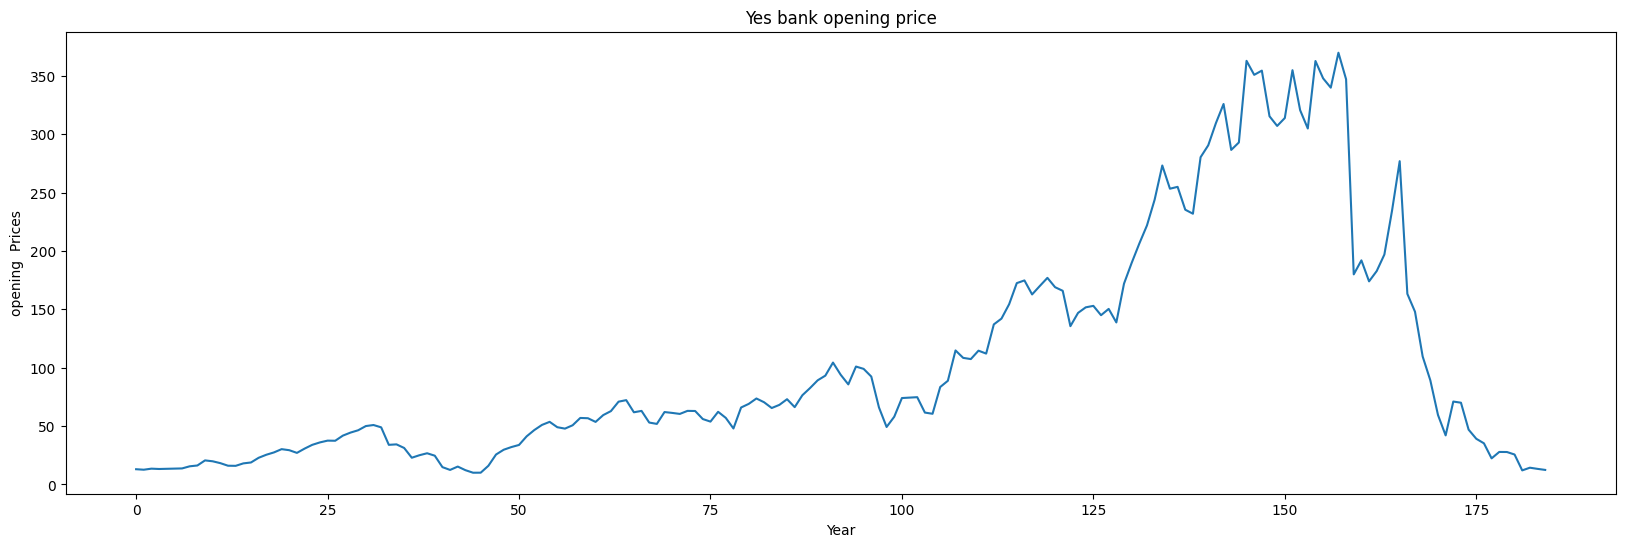

In [11]:
# open price vs year graph
plt.figure(figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('opening  Prices')
plt.plot(df['Open'])
plt.title('Yes bank opening price')
plt.show()

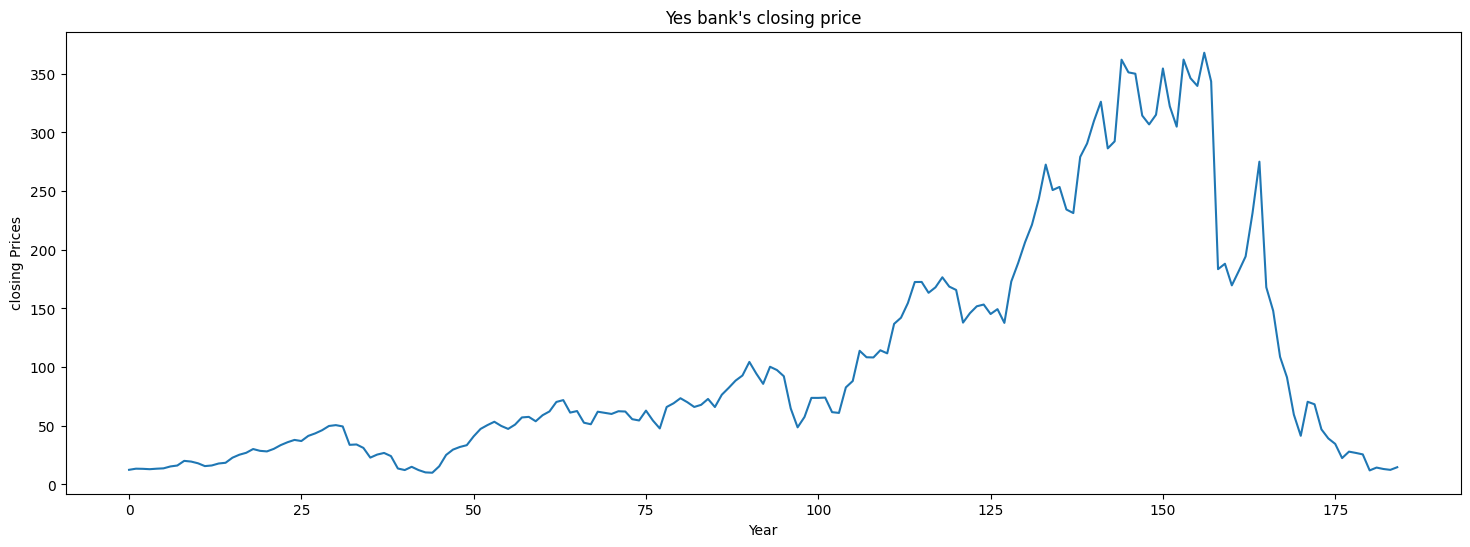

In [12]:
# close price vs year graph
plt.figure(figsize=(18,6))
plt.xlabel('Year')
plt.ylabel('closing Prices')
plt.plot(df['Close'])
plt.title("Yes bank's closing price")
plt.show()

The sudden crash towards the  2018 is evident. 

**Let's see the data distribution of each feature.**

<ipython-input-13-ed7c54514c5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'],color="b")


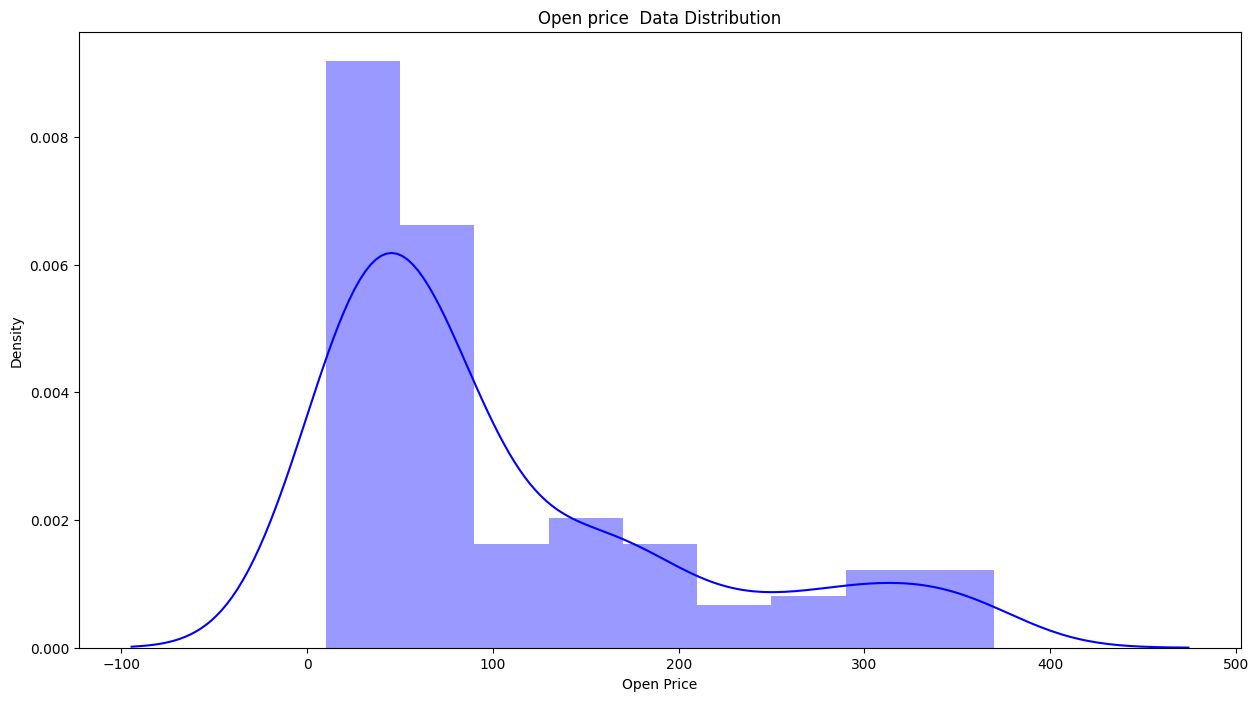

In [13]:
# data distribution
plt.figure(figsize=(15,8))
sns.distplot(df['Open'],color="b")
plt.title('Open price  Data Distribution')
plt.xlabel('Open Price')
plt.show()

<ipython-input-14-8d27898252d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'],color="g")


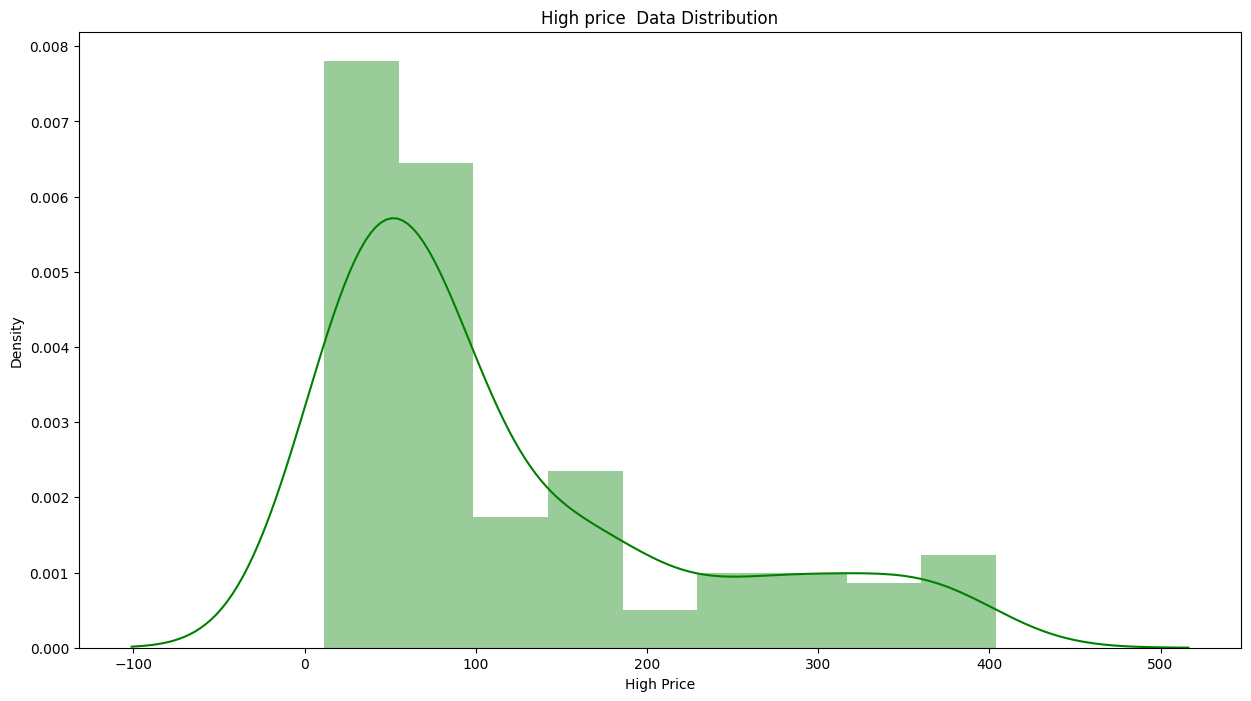

In [14]:
# data distribution
plt.figure(figsize=(15,8))
sns.distplot(df['High'],color="g")
plt.title('High price  Data Distribution')
plt.xlabel('High Price')
plt.show()

<ipython-input-15-14b88549b67e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Low'],color="r")


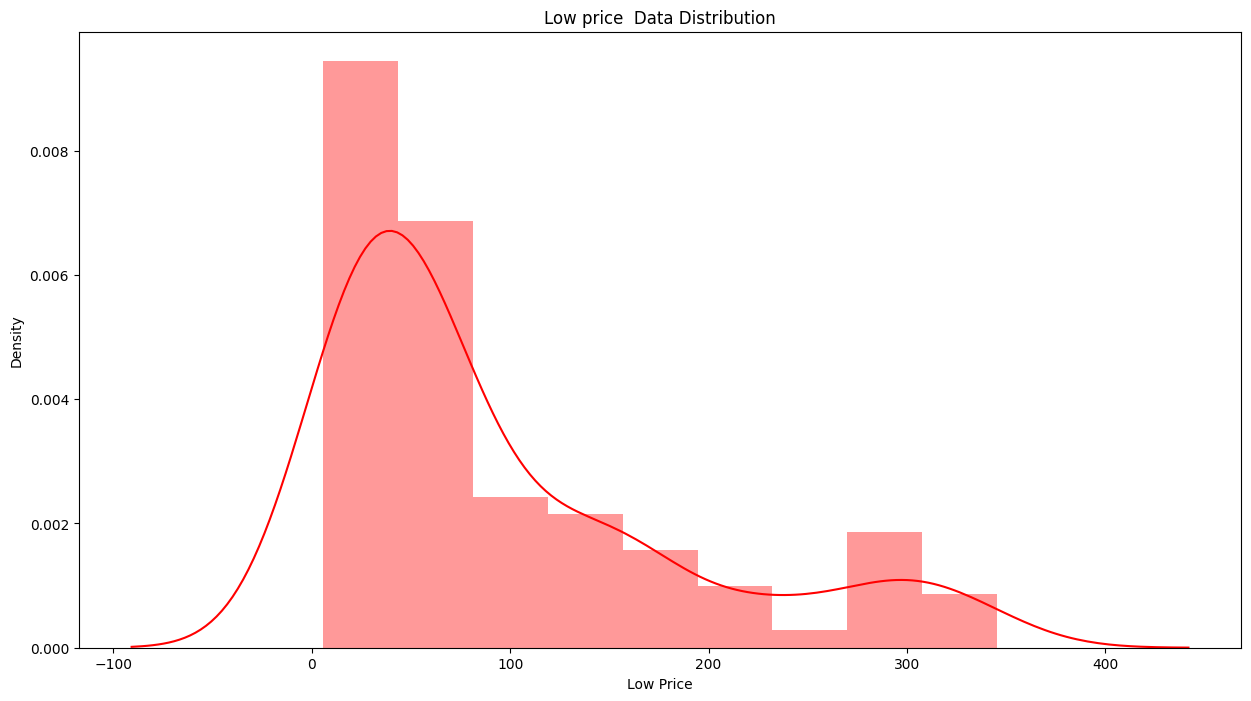

In [15]:
# data distribution
plt.figure(figsize=(15,8))
sns.distplot(df['Low'],color="r")
plt.title('Low price  Data Distribution')
plt.xlabel('Low Price')
plt.show()

<ipython-input-16-706e368e9883>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'],color="y")


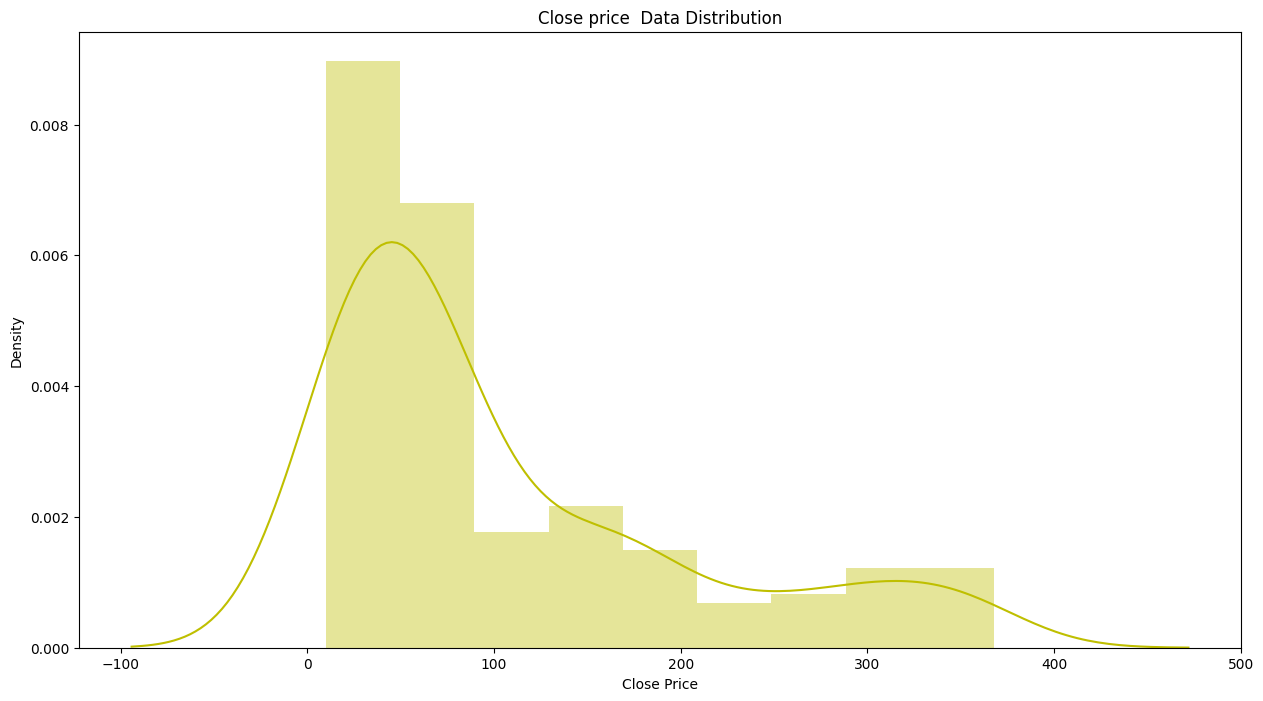

In [16]:
# data distribution
plt.figure(figsize=(15,8))
sns.distplot(df['Close'],color="y")
plt.title('Close price  Data Distribution')
plt.xlabel('Close Price')
plt.show()

**Histogram plot of all feaures are positively skewed.**

---

**Given data is not normally distributed. We will apply log transformation to remove skewness from our dataset that will make our data distribution normal.**

<ipython-input-17-317b462d098d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Close']))


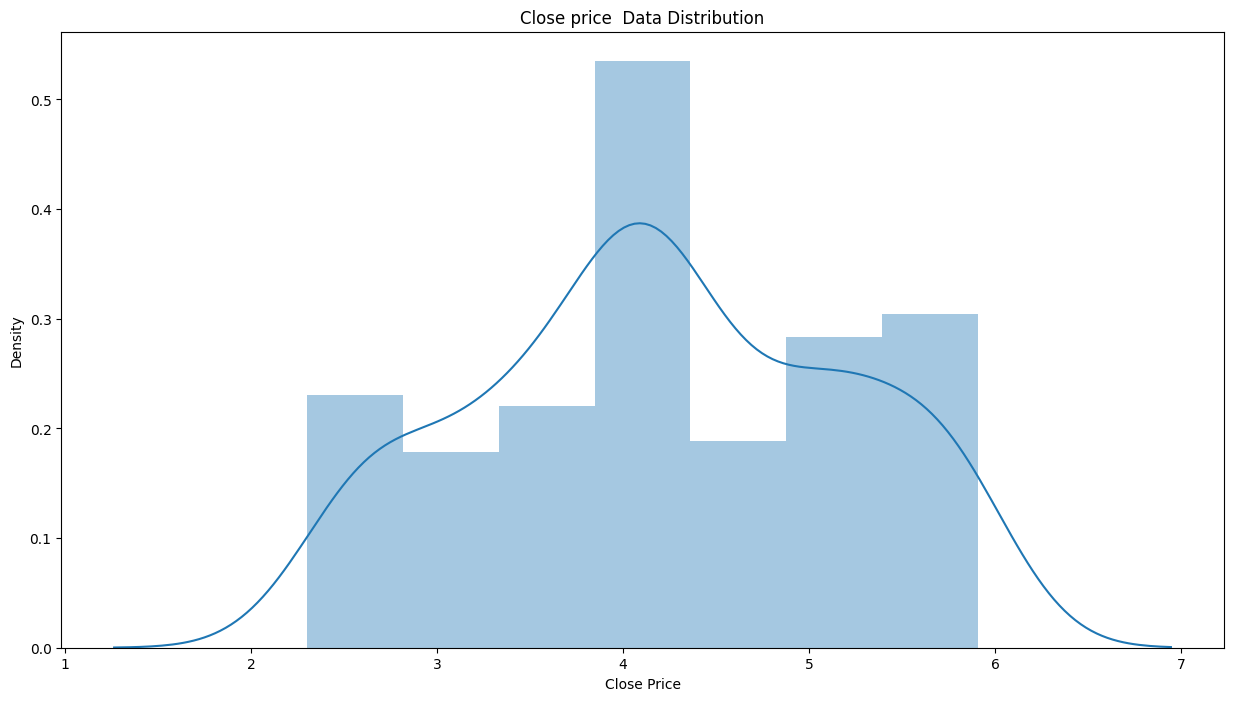

In [17]:
# applying log transformation to make the data normally distributed.
plt.figure(figsize=(15,8))
sns.distplot(np.log(df['Close']))
plt.title('Close price  Data Distribution')
plt.xlabel('Close Price')
plt.show()


**Our objective is to predict closing price, therefore closing price WILL be our dependent variable. Open, high and low price of stock will be the independent variables.**





***We can see that our dependent variable is normally distributed after applying log transformation. ***

---



**Applying log transformation to our independent variables.**





<ipython-input-18-e5c93e98617f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Open']), color = 'Green')
<ipython-input-18-e5c93e98617f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['High']), color = 'Darkorange')
<ipython-input-18-e5c93e98617f>:15: UserWarning: 

`di

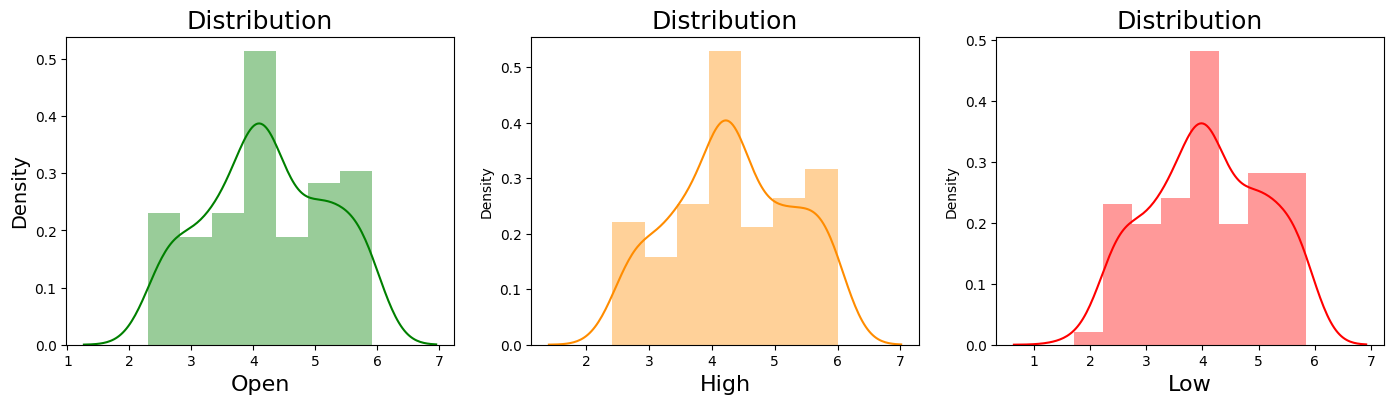

In [18]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(np.log(df['Open']), color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(np.log(df['High']), color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(np.log(df['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

**Now all of our dependent and independent variables are normally distributed.**


---



Lets find out the relation between independent and dependent variable. 

<Axes: title={'center': 'Open Vs Close'}, xlabel='Open', ylabel='Close'>

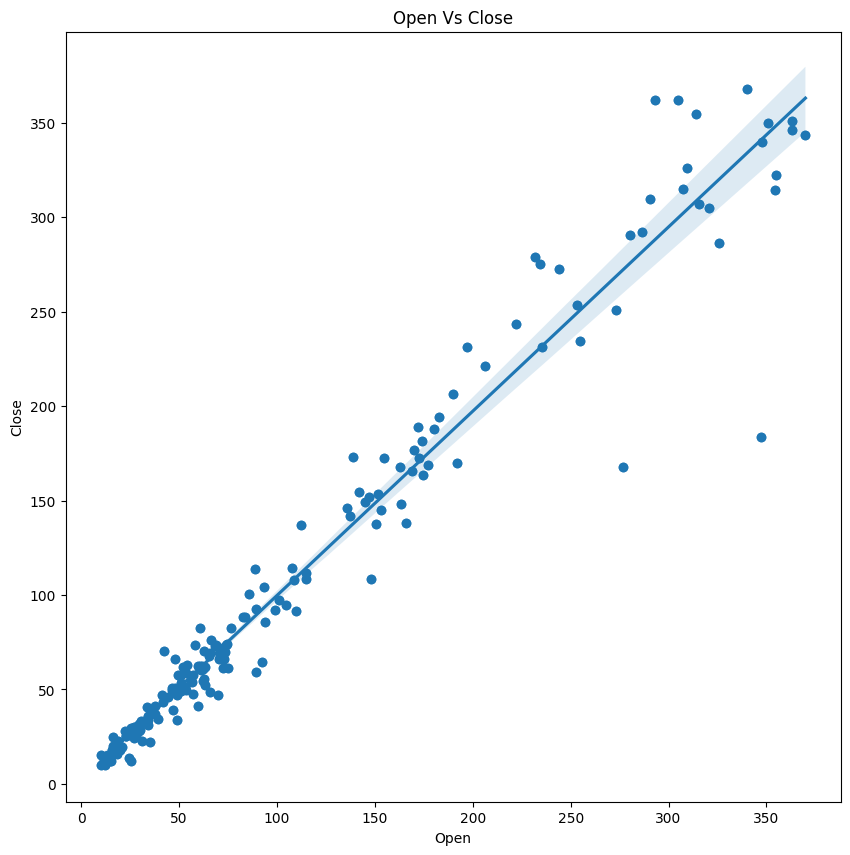

In [19]:
plt.figure(figsize=(10,10))

plt.scatter(df['Open'],df['Close'])
plt.title('Open Vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x ='Open', y = 'Close', data= df)


<Axes: title={'center': 'High Vs Close'}, xlabel='High', ylabel='Close'>

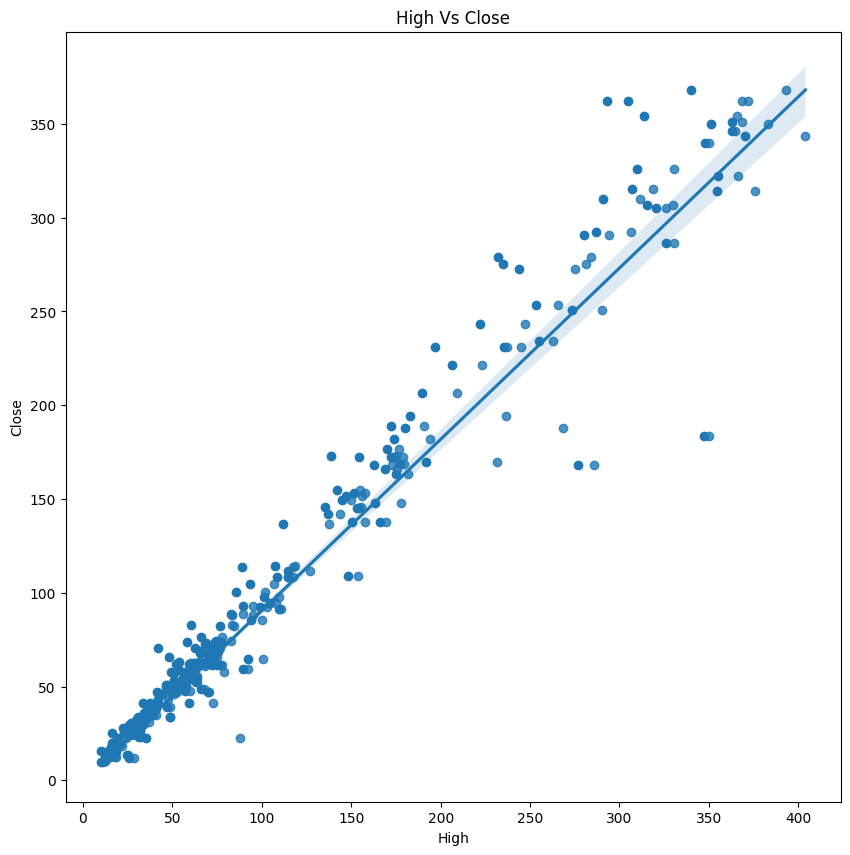

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(df['Open'],df['Close'])
plt.title('High Vs Close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x ='High', y = 'Close', data= df)


<Axes: title={'center': 'Low VS Close'}, xlabel='Low', ylabel='Close'>

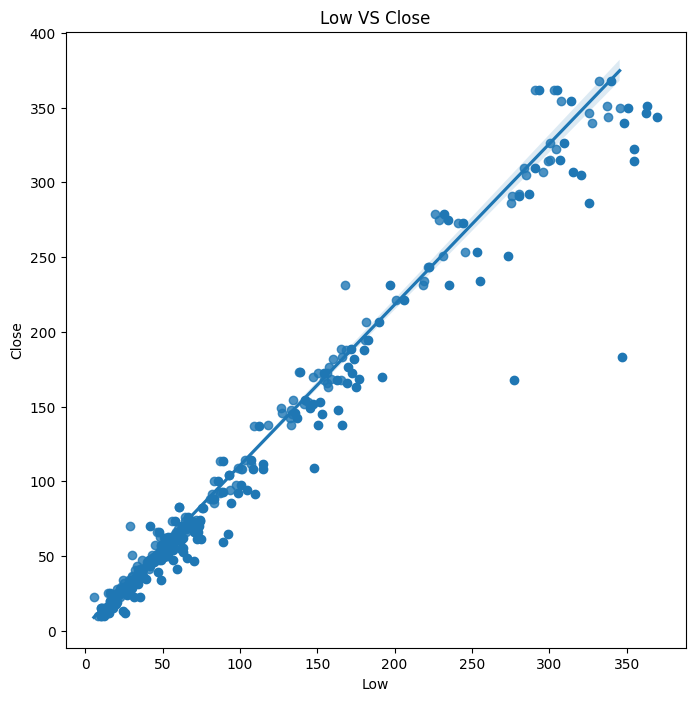

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(df['Open'],df['Close'])
plt.title('Low VS Close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x ='Low', y = 'Close', data= df)


 

*  In the Dataset(df) Close Column is  dependent Variable and Open, High, Low column's are  independent variables. 
*  We  can clearly see that dependent and independent features are linearly related with each other.



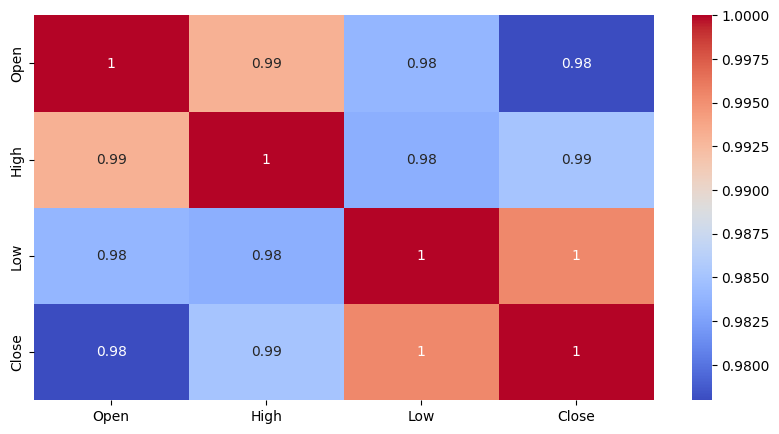

In [22]:
#finding correlation

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

* The  Heatmap is showing high correlation between the features.
* To handle multi-collinearity we will use regularization technique(like L1 and L2)



**DATA MODELLING**

In [23]:
# Separating dependent and independent variables
indep_var=df[['High','Low','Open']].values
dep_var=df["Close"].values

In [24]:
indep_var

array([[ 14.  ,  11.25,  13.  ],
       [ 14.88,  12.55,  12.58],
       [ 14.87,  12.27,  13.48],
       [ 14.47,  12.4 ,  13.2 ],
       [ 13.88,  12.88,  13.35],
       [ 14.44,  13.  ,  13.49],
       [ 17.16,  13.58,  13.68],
       [ 16.97,  15.4 ,  15.5 ],
       [ 20.95,  16.02,  16.2 ],
       [ 20.8 ,  18.02,  20.56],
       [ 21.8 ,  15.8 ,  19.8 ],
       [ 18.4 ,  13.4 ,  18.2 ],
       [ 17.2 ,  13.82,  16.  ],
       [ 18.6 ,  15.7 ,  15.9 ],
       [ 18.88,  16.8 ,  18.  ],
       [ 24.2 ,  18.5 ,  18.78],
       [ 28.47,  21.4 ,  22.8 ],
       [ 29.66,  24.4 ,  25.4 ],
       [ 34.16,  27.  ,  27.4 ],
       [ 32.6 ,  26.8 ,  30.2 ],
       [ 31.58,  23.31,  29.3 ],
       [ 31.99,  26.2 ,  27.  ],
       [ 36.14,  29.11,  30.66],
       [ 36.38,  30.4 ,  33.89],
       [ 41.04,  35.02,  35.98],
       [ 39.  ,  30.2 ,  37.5 ],
       [ 41.75,  35.3 ,  37.4 ],
       [ 47.3 ,  33.6 ,  41.8 ],
       [ 50.98,  40.02,  44.4 ],
       [ 54.  ,  45.  ,  46.4 ],
       [ 5

In [25]:
dep_var

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [26]:
#Train Test Split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=42)

In [27]:
#Checking shape
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [28]:
#standardizing the data 
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

<!-- **Linear Regression** -->

##**Linear Regression**

In [29]:
# implementing Linear_regression model
regres = LinearRegression().fit(x_train, y_train)

In [30]:
regres.score(x_train, y_train)

0.9961188216222026

In [31]:
regres.coef_

array([ 210.84639092,  330.96928956, -181.85661918])

In [32]:
regres.intercept_

10.217552701683289

In [33]:
# predicted value
y_pred = regres.predict(x_test)
y_pred

array([ 28.6190045 ,  13.66168573, 363.33839626, 124.17671413,
       305.26722496,  21.91691304,  38.27383609,  58.73154223,
       160.90253388,  62.00628157,  45.26353104, 191.39492686,
        64.47294842,  35.03650587,  14.49157883,  24.99164024,
        43.56194427,  23.79221674,  59.69339059,  50.10725943,
       173.92671354, 148.25904061, 364.51050994,  34.29337498,
        18.59279993, 130.21135732,  57.59097654,  31.1823076 ,
        49.17952303, 141.98043543,  54.83307176,  46.51316738,
       161.28588766, 253.43779151,  50.48582851,  49.70307402,
        36.31492152])

In [34]:
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE :",mean_absolute_error(y_test, y_pred))
print("R2 :",r2_score(y_test, y_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 91.13661313103884
RMSE : 9.54654980246994
MAE : 5.766866057975681
R2 : 0.9899172149339619
Adjusted R2: 0.9890005981097766


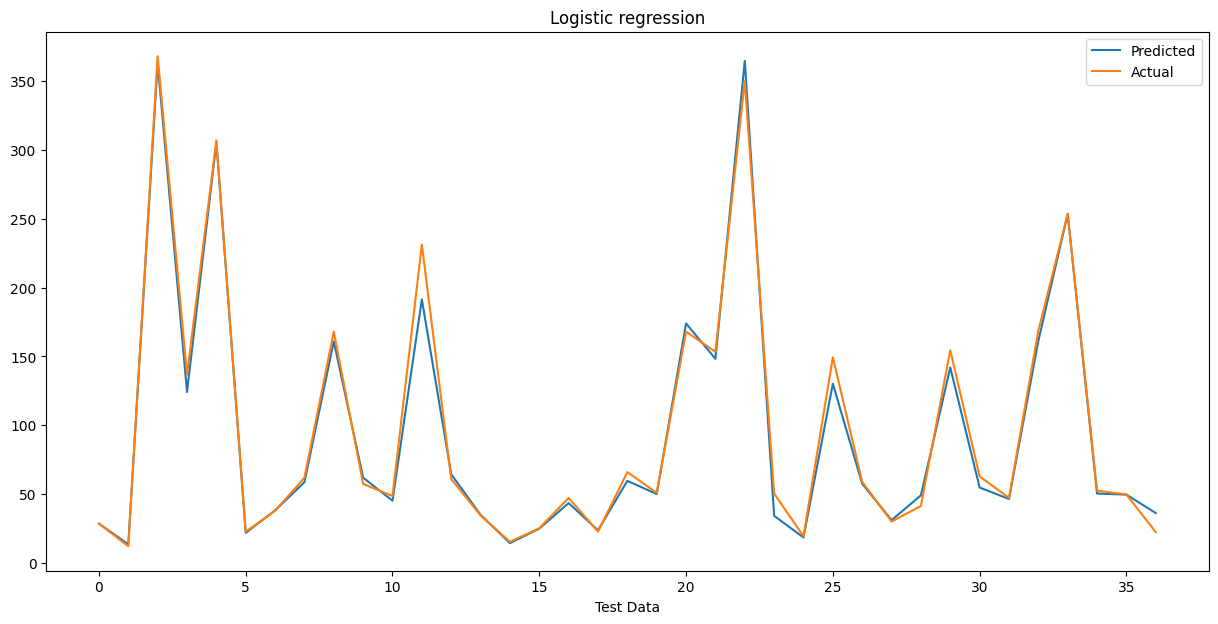

In [63]:
plt.figure(figsize=(15,7))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.title ('Logistic regression')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()



1. Linear regression is giving about 99% correct prediction.
2. It's r2 score is 0.99 which is very good.




##**LASSO REGRESSION**

In [36]:
# implementing lasso_regression model
lasso  = Lasso(alpha=0.0001 , max_iter= 2000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=2000)

In [37]:
lasso.score(x_train,y_train)

0.9961188202991728

In [38]:
lasso_pred=lasso.predict(x_test)
lasso_pred

array([ 28.62162362,  13.66359059, 363.33407545, 124.17459749,
       305.27301561,  21.91859698,  38.27608377,  58.73166213,
       160.90628325,  62.00078052,  45.26516795, 191.38786707,
        64.47555813,  35.0394046 ,  14.49237038,  24.99323834,
        43.5620397 ,  23.79469765,  59.69698828,  50.1101768 ,
       173.92220732, 148.26369979, 364.51339709,  34.29369217,
        18.59590117, 130.21495515,  57.5930844 ,  31.1838223 ,
        49.17792427, 141.98265088,  54.83344731,  46.51622383,
       161.29131028, 253.44375551,  50.48884208,  49.70479348,
        36.29880088])

In [39]:
# Let's check through cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+03, tolerance: 1.080e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 1.156e+02

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [40]:
#Best alpha value is
lasso_regressor.best_params_


{'alpha': 0.001}

In [41]:
#Best score
lasso_regressor.best_score_

-47.84050727459627

In [42]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [43]:
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 91.06384661658073
RMSE : 9.542737899396625
MAE : 5.755158709341523
R2 : 0.9899252653661655
Adjusted R2: 0.9890093803994533


The value of R2 score is 99% which shows our model is good  for prediction.

# **Visualizing  actual values and predicted values**

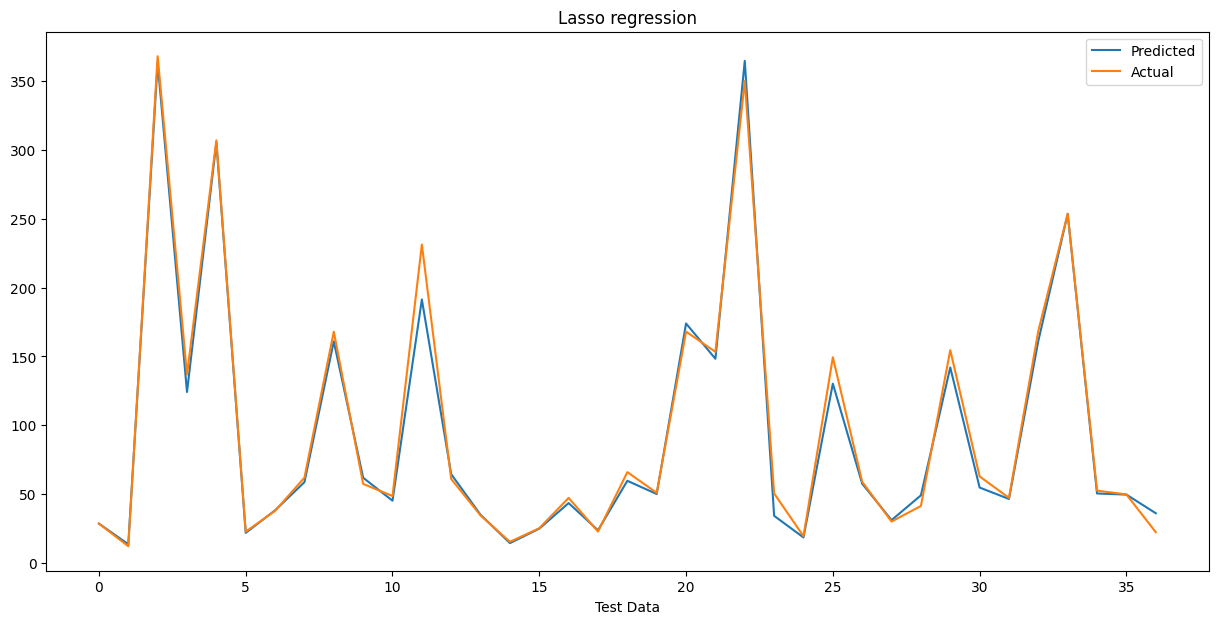

In [64]:
plt.figure(figsize=(15,7))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.title ('Lasso regression')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

##**Ridge regression**

In [45]:
# implementing ridge_regression model
ridge  = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [46]:
ridge.score(x_train,y_train)

0.9960460046494937

In [47]:
ridge_pred=ridge.predict(x_test)
ridge_pred

array([ 28.98567764,  13.95410107, 362.58948179, 123.74676234,
       306.57807354,  22.01400936,  38.46981639,  58.60209619,
       161.53876075,  61.19959612,  46.33104553, 191.35615928,
        64.72374341,  35.5317697 ,  14.45625612,  25.12319232,
        43.59062773,  24.37315317,  60.53829191,  50.37095027,
       177.92593281, 149.01396644, 364.72559353,  35.04257978,
        19.00045952, 131.30686502,  57.73109402,  31.25210019,
        49.58231893, 142.39954627,  54.95086781,  46.97309064,
       162.60248682, 254.29095956,  51.34334875,  49.8315177 ,
        35.09328115])

In [48]:
# cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [49]:
ridge_regressor.best_params_

{'alpha': 0.001}

In [50]:
ridge_regressor.best_score_

-48.41363575817928

In [51]:
#Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

In [52]:
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 90.85358137863582
RMSE : 9.531714503626082
MAE : 5.749969627791745
R2 : 0.9899485277974566
Adjusted R2: 0.9890347575972254


# **Visualizing  actual values and predicted values**

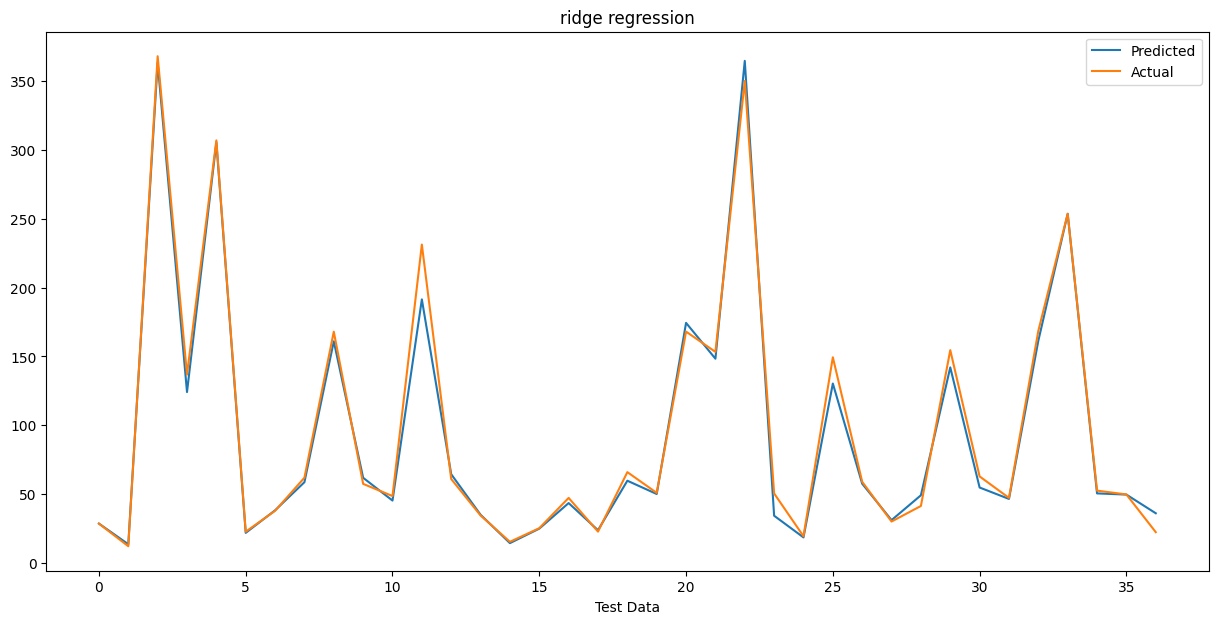

In [65]:
plt.figure(figsize=(15,7))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.title('ridge regression')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

##**ELASTICNET REGRESSION




In [54]:
# implementing Elasticnet_regression model
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [55]:
# prediction
easticnet_pred=elasticnet.predict(x_test)
easticnet_pred

array([ 30.04494212,  14.83739037, 360.22614448, 122.35345893,
       310.88951106,  22.13484597,  38.89341929,  58.06143796,
       163.47610365,  58.86885062,  50.42662471, 192.41348165,
        65.30295541,  37.06709072,  14.19265209,  25.39939809,
        43.70454288,  26.33443373,  63.37721736,  50.95217307,
       195.06596541, 151.28073928, 365.04765953,  38.06837616,
        20.14530659, 135.15666645,  57.9464866 ,  31.28883796,
        51.52213186, 143.72032144,  55.37817678,  48.3338304 ,
       167.03176793, 256.70987233,  54.33789954,  50.06864562,
        32.92530046])

In [56]:
# cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+03, tolerance: 1.080e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 1.156e+02

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [57]:
elastic_regressor.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.8}

In [58]:
elastic_regressor.best_score_

-47.974916222384046

In [59]:

#Prediction
y_pred_elastic = elastic_regressor.predict(x_test)

In [60]:
print("MSE :",mean_squared_error(y_test, y_pred_elastic))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_elastic)))
print("MAE :",mean_absolute_error(y_test, y_pred_elastic))
print("R2 :",r2_score(y_test, y_pred_elastic))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 91.13661239308217
RMSE : 9.5465497638195
MAE : 5.766866029750329
R2 : 0.9899172150156048
Adjusted R2: 0.9890005981988416


# **Visualizing  actual values and predicted values**

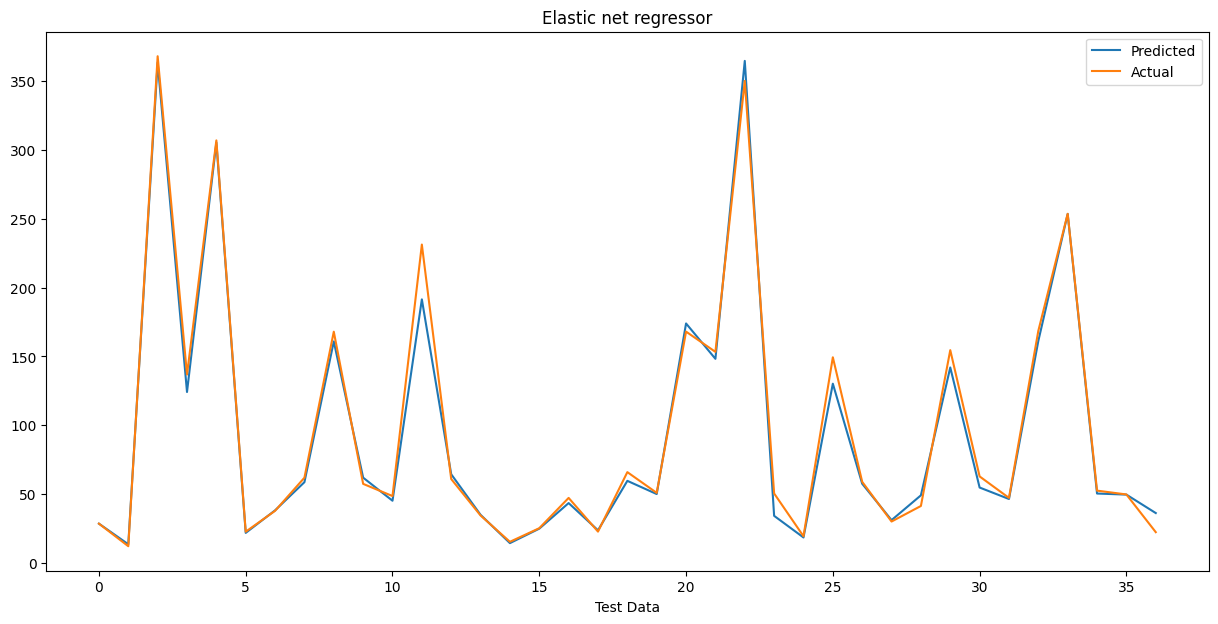

In [66]:
plt.figure(figsize=(15,7))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.title('Elastic net regressor')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

##**CONCLUSION**


*   This project is about the  of Yes bank's stock price prediction.



*   This dataset has 185 rows and 5 columns.


*   Histogram plot of all feaures are rightly skewed.

*   It is concluded by the project that The sudden crash we see  in the graph after 2018  is due to the spread of Fraud case news among Stock Holder's which created bearishness in the stock prices.




*   In the Dataset Close Column is dependent Variable and Open, High, Low column's are independent features.



*   Dependent and Independent features are linearly related with each other.

*   The Heatmap showed high correlation between the features.
*   Then We implemented Linear regression ,Lasso regression,Ridge regression and Elasticnet regression and the accuracy score that we got for all the models  is almost 99%,which shows that we achieved a good fit model for our dataset.











